In [1]:
from htmd.ui import *

2022-09-19 14:37:30,068 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.



Please cite HTMD: Doerr et al.(2016)JCTC,12,1845. https://dx.doi.org/10.1021/acs.jctc.6b00049

HTMD Documentation at: https://www.htmd.org/docs/latest/

Failed at checking latest conda version. (AttributeError)
There is something wrong with your /home/sdoerr/.htmd/.latestversion file. Will not check for new HTMD versions.


In [6]:
from htmd.home import home

dirs = glob(os.path.join(home(dataDir="dialanine-implicit-simulations"), "*"))
sims = simlist(dirs, dirs)

Creating simlist: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 1415.20it/s]


In [28]:
mol = Molecule(sims[0])

metr = Metric(sims)
dih = [Dihedral.phi(mol, 1, 2), Dihedral.psi(mol, 2, 3)]
metr.set(MetricDihedral(dih, sincos=False))
plotdata = metr.project()

metr = Metric(sims)
dih = [Dihedral.phi(mol, 1, 2), Dihedral.psi(mol, 2, 3)]
metr.set(MetricDihedral(dih, sincos=True))
data = metr.project()

Projecting trajectories: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 200.61it/s]
/home/sdoerr/Work/htmd/htmd/projections/metric.py:206: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  data.fstep = float(stats.mode(fstep).mode)
2022-09-19 14:47:14,008 - htmd.projections.metric - INFO - Frame step 0.1ns was read from the trajectories. If it looks wrong, redefine it by manually setting the MetricData.fstep property.
Projecting trajectories: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████

In [29]:
data.description

,type,atomIndexes,description
0,dihedral,"[4, 6, 8, 14]",Sine of angle of (ACE 1 C ) (ALA 2 N ) (ALA ...
1,dihedral,"[4, 6, 8, 14]",Cosine of angle of (ACE 1 C ) (ALA 2 N ) (AL...
2,dihedral,"[6, 8, 14, 16]",Sine of angle of (ALA 2 N ) (ALA 2 CA ) (ALA...
3,dihedral,"[6, 8, 14, 16]",Cosine of angle of (ALA 2 N ) (ALA 2 CA ) (A...


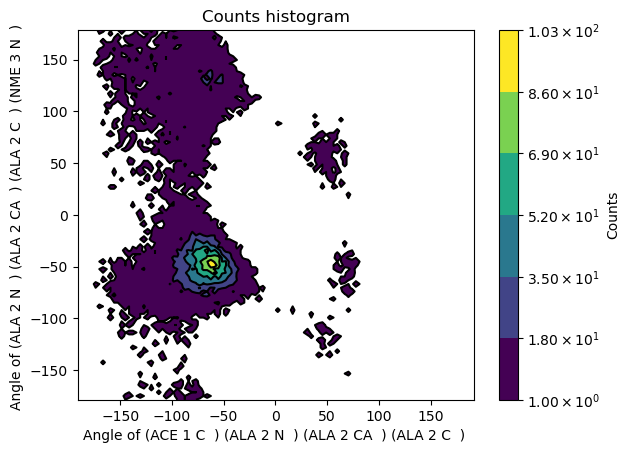

In [30]:
plotdata.plotCounts(0, 1)

In [31]:
data.cluster(MiniBatchKMeans(4))

/home/sdoerr/Work/htmd/htmd/metricdata.py:679: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(np.split(array, indeces[:-1]))


estimating MaximumLikelihoodMSM:   0%|                                                                        …

19-09-22 14:47:39 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[53] WARNING  Changed user setting nits to the number of available timescales nits=3


2022-09-19 14:47:39,677 - pyemma.msm.estimators.implied_timescales.ImpliedTimescales[53] - WARNING - Changed user setting nits to the number of available timescales nits=3


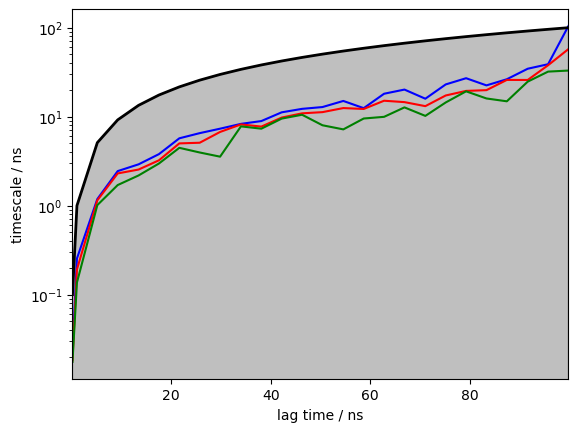

In [32]:
model = Model(data)
model.plotTimescales()

In [34]:
model.markovModel(10, 2, units="ns")

2022-09-19 14:51:36,875 - htmd.model - INFO - 100.0% of the data was used
2022-09-19 14:51:36,876 - htmd.model - INFO - Number of trajectories that visited each macrostate:
2022-09-19 14:51:36,876 - htmd.model - INFO - [20 20]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1161.05it/s]


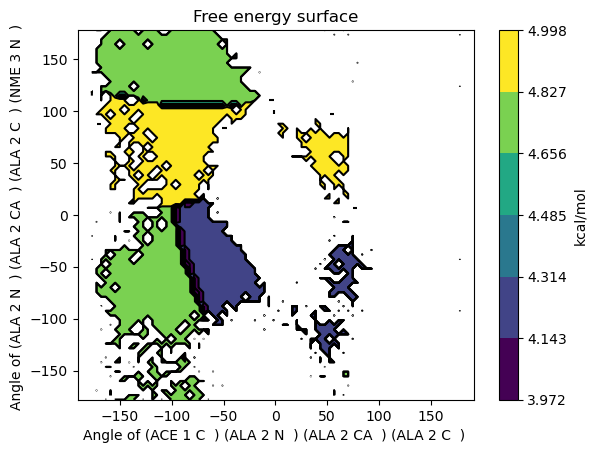

In [38]:
model.plotFES(0, 1, 300, data=plotdata)